In [5]:
!mkdir Lab04-Rajvib-0

In [6]:
!git clone https://github.com/DS605-2025-FOML/data-preprocessing-and-regression-with-scikit-learn-Rajvib-0 Lab04-Rajvib-0/data-preprocessing-and-regression-with-scikit-learn-Rajvib-0

Cloning into 'Lab04-Rajvib-0/data-preprocessing-and-regression-with-scikit-learn-Rajvib-0'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 4 (from 2)
Receiving objects: 100% (7/7), 108.34 KiB | 13.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [7]:
import pandas as pd
url= "https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv"
df=pd.read_csv(url)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Task 1: Advanced Exploratory Data Analysis (EDA) & Feature Engineering

1. Outlier Detection and Handling:

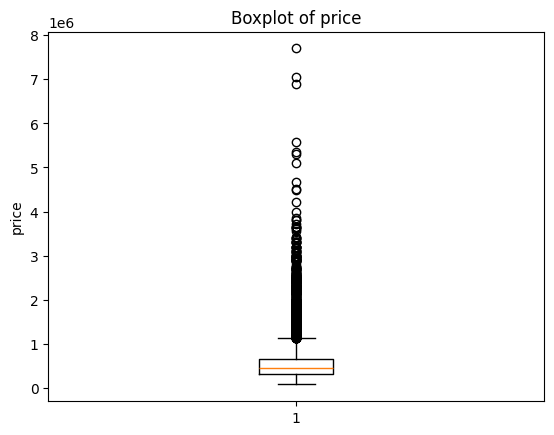

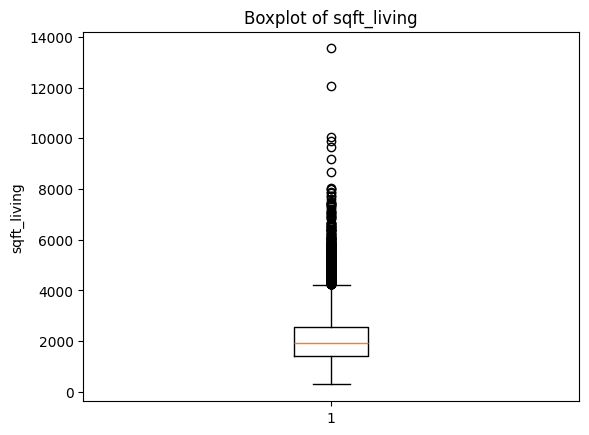

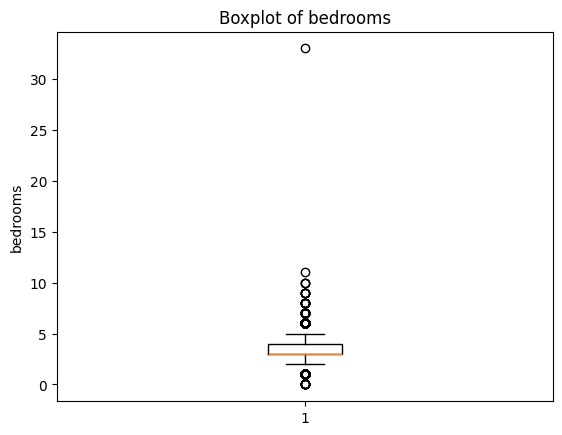

In [8]:
'''import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for 'price', 'sqft_living', and 'bedrooms'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['price'])
plt.title('Boxplot of Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['sqft_living'])
plt.title('Boxplot of Sqft Living')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['bedrooms'])
plt.title('Boxplot of Bedrooms')

plt.tight_layout()
plt.show()'''
import pandas as pd;
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv')
for col in ['price', 'sqft_living', 'bedrooms']:
    plt.boxplot(df[col].dropna());
    plt.title(f'Boxplot of {col}'); plt.ylabel(col); plt.show()

In [9]:
#Identify and remove egregious outliers.
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
clean_df = remove_outliers(df, ['price', 'sqft_living', 'bedrooms'])
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(clean_df)}")
print(f"Rows removed: {len(df) - len(clean_df)}")

Original rows: 21613
Cleaned rows: 19687
Rows removed: 1926


- IQR is good because it focuses on the middle 50% of values,it get easy for housing data where prices and sizes vary widely.
-A house with 33 bedrooms is extreme

2. Advanced Feature Engineering: Create the following new features, as they
often provide more predictive power than raw data:

1.Date-Based Features:

In [10]:
# Do not drop the date column. Convert it to a datetime object and engineer the following:
clean_df['date'] = pd.to_datetime(clean_df['date'])

#sale_year: The year the house was sold.
clean_df['sale_year'] =clean_df['date'].dt.year

#sale_month: The month the house was sold.
clean_df['sale_month'] =clean_df['date'].dt.month

#house_age: The age of the house at the time of sale (sale_year - yr_built).
clean_df['house_age'] =clean_df['sale_year'] - clean_df['yr_built']

clean_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,28


2.Renovation Status:

In [11]:
#was_renovated: A binary feature (1 if yr_renovated is not 0,else 0).
import numpy as np
clean_df['was_renovated'] = np.where(clean_df['yr_renovated'] != 0, 1, 0)
clean_df[['yr_renovated', 'was_renovated']].head()
#age_since_renovation: Years since renovation. If never renovated, this could be the same as house_age. Think about the best way to handle this.
current_year = 2025
clean_df['house_age'] = current_year - clean_df['yr_built']
clean_df['age_since_renovation'] = np.where(clean_df['yr_renovated'] != 0,
                                      current_year - clean_df['yr_renovated'],
                                      clean_df['house_age'])
clean_df[['house_age','age_since_renovation']].head()

,house_age,age_since_renovation
0,70,70
1,74,34
2,92,92
3,60,60
4,38,38


3. Ratio Features:

In [12]:
#sqft_living_per_floor: sqft_living / floors. (Handle cases where floors might be 0).
clean_df['sqft_living_per_floor'] = np.where(clean_df['floors'] != 0,
                                       clean_df['sqft_living'] / clean_df['floors'],
                                       0)

#bath_per_bed: bathrooms / bedrooms. (Handle cases where bedrooms might be 0).
clean_df['bath_per_bed'] = np.where(clean_df['bedrooms'] != 0,
                              clean_df['bathrooms'] / clean_df['bedrooms'],0)

clean_df[['bath_per_bed','sqft_living_per_floor']].head()

,bath_per_bed,sqft_living_per_floor
0,0.333333,1180.0
1,0.750000,1285.0
2,0.500000,770.0
3,0.750000,1960.0
4,0.666667,1680.0


Task 2: Build a Sophisticated Preprocessing Pipeline

1. Identify Feature Types:

In [13]:
#Numerical Features:
num_f = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
                      'sqft_living15', 'sqft_lot15', 'house_age', 'age_since_renovation',
                      'sqft_living_per_floor', 'bath_per_bed', 'lat', 'long'] # Removed 'price' as it's the target

print("Numerical Features:", num_f)
#Categorical Features:
cf = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
                        'condition', 'grade', 'zipcode', 'sale_year', 'sale_month', 'was_renovated']
print("Categorical Features:", cf)

#Passthrough Features:
pf = ['id', 'date']
print("Passthrough Features:", pf)

Numerical Features: ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age', 'age_since_renovation', 'sqft_living_per_floor', 'bath_per_bed', 'lat', 'long']
Categorical Features: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'sale_year', 'sale_month', 'was_renovated']
Passthrough Features: ['id', 'date']


2. Create Preprocessing Pipelines for Each Type:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Create a Pipeline that first imputes missing values and then scales the data
'''numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])'''

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Categorical Pipeline:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


3. Combine Pipelines with ColumnTransformer:

In [16]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_f),
        ('cat', categorical_transformer, cf)
    ],
    remainder='passthrough'
)

print("ColumnTransformer created to combine preprocessing pipelines.")

ColumnTransformer created to combine preprocessing pipelines.


Task 3: Model Training and Hyperparameter Tuning

Select Candidate Models:

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Define the models
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Create pipelines for each model
pipeline_gbr = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', gbr)])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb)])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', rf)])

print("Pipelines for Gradient Boosting, XGBoost, and Random Forest created.")

Pipelines for Gradient Boosting, XGBoost, and Random Forest created.


2. Hyperparameter Tuning with GridSearchCV:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Drop the 'id' and 'date' columns before splitting the data
X = clean_df.drop(['price', 'id', 'date'], axis=1)
y = clean_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grid_gbr = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1]
}

param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1]
}

param_grid_rf = {
    'regressor__n_estimators': [50],
    'regressor__max_depth': [5, 10]
}

# Set up GridSearchCV for each model
grid_search_gbr = GridSearchCV(pipeline_gbr, param_grid_gbr, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=2, scoring='neg_mean_squared_error')

# Train GridSearchCV on the training data
print("Performing Grid Search for Gradient Boosting...")
grid_search_gbr.fit(X_train, y_train)
print("Grid Search for Gradient Boosting complete.")

print("Performing Grid Search for XGBoost...")
grid_search_xgb.fit(X_train, y_train)
print("Grid Search for XGBoost complete.")

print("Performing Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("Grid Search for Random Forest complete.")

print("\nBest parameters found:")
print("Gradient Boosting:", grid_search_gbr.best_params_)
print("XGBoost:", grid_search_xgb.best_params_)
print("Random Forest:", grid_search_rf.best_params_)

Performing Grid Search for Gradient Boosting...
Grid Search for Gradient Boosting complete.
Performing Grid Search for XGBoost...
Grid Search for XGBoost complete.
Performing Grid Search for Random Forest...
Grid Search for Random Forest complete.

Best parameters found:
Gradient Boosting: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}
XGBoost: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}
Random Forest: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Performing Grid Search for Gradient Boosting...
Grid Search for Gradient Boosting complete.
Performing Grid Search for XGBoost...
Grid Search for XGBoost complete.
Performing Grid Search for Random Forest...
Grid Search for Random Forest complete.

Best parameters found:
Gradient Boosting: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}
XGBoost: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}
Random Forest: {'regressor__max_depth': None, 'regressor__

Task 4: Evaluation and Interpretation

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

best_model = None
best_score = -float('inf')

if grid_search_gbr.best_score_ > best_score:
    best_score = grid_search_gbr.best_score_
    best_model = grid_search_gbr.best_estimator_

if grid_search_xgb.best_score_ > best_score:
    best_score = grid_search_xgb.best_score_
    best_model = grid_search_xgb.best_estimator_

if grid_search_rf.best_score_ > best_score:
    best_score = grid_search_rf.best_score_
    best_model = grid_search_rf.best_estimator_

print(f"Best model: {best_model.named_steps['regressor']}")
print(f"Best parameters: {best_model.named_steps['regressor'].get_params()}")

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nEvaluation on Test Set:")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)
Best parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable

2. Performance Comparison:


RMSE Comparison Table:


,Model,RMSE
0,Best Tuned Model (Current),70586.121631
1,Best Model (Original Notebook),212131.231023



Percentage Improvement in RMSE: 66.73%


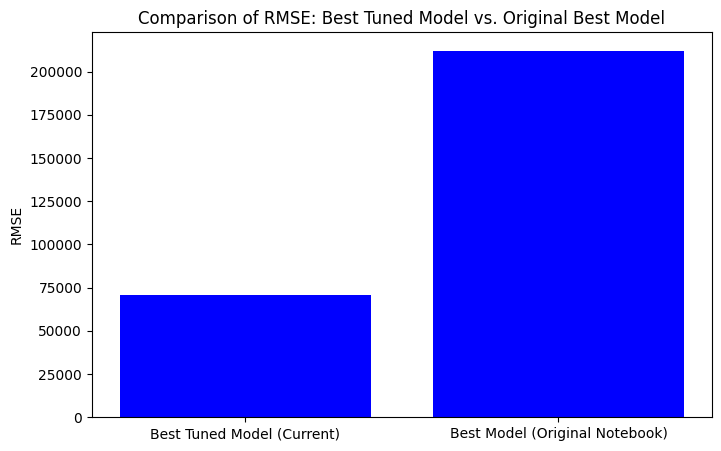

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
tuned_model_rmse = rmse

original_notebook_best_rmse = 212131.231023

if original_notebook_best_rmse is not None:
    comparison_data = {'Model': ['Best Tuned Model (Current)', 'Best Model (Original Notebook)'],
                       'RMSE': [tuned_model_rmse, original_notebook_best_rmse]}
    comparison_df = pd.DataFrame(comparison_data)

    print("RMSE Comparison Table:")
    display(comparison_df)
    if original_notebook_best_rmse != 0:
        percentage_improvement = ((original_notebook_best_rmse - tuned_model_rmse) / original_notebook_best_rmse) * 100
        print(f"\nPercentage Improvement in RMSE: {percentage_improvement:.2f}%")
    plt.figure(figsize=(8, 5))
    plt.bar(comparison_df['Model'], comparison_df['RMSE'], color=['blue', 'blue'])
    plt.ylabel('RMSE')
    plt.title('Comparison of RMSE: Best Tuned Model vs. Original Best Model')
    plt.show()
else:
    print("Please provide the RMSE of the best model from the original notebook to perform the comparison.")

3. Feature Importance:


Text(0.5, 1.0, 'Most Important Features')

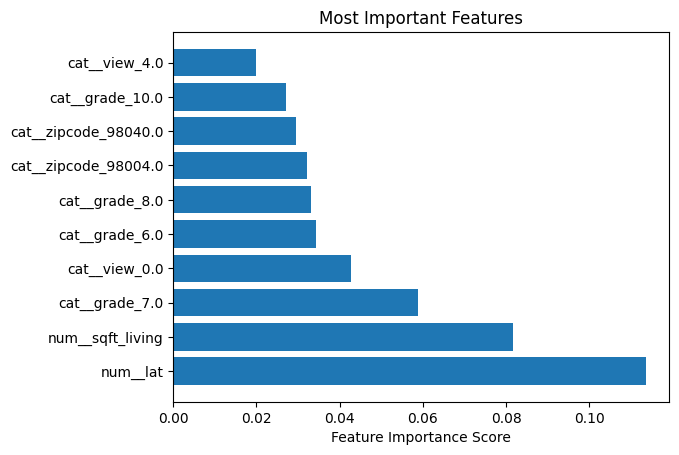

In [27]:
plt.barh(feature_importance_df.head(10)['feature'], feature_importance_df.head(10)['importance'])
plt.xlabel('Feature Importance Score')
plt.title('Most Important Features')

Write a brief summary analyzing the top 5 most important features.
Do they make sense? Are any of your engineered features in the top
5?

In [25]:
# Display the top 5 most important features
display(feature_importance_df.head(5))

,feature,importance
10,num__lat,0.113500
0,num__sqft_living,0.081547
55,cat__grade_7.0,0.058728
42,cat__view_0.0,0.042659
54,cat__grade_6.0,0.034290


So, above 5 are imp i.e location, no.sq feet, grade, view.
we did't use any of them.